**nonlinear learning models **

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import datasets, layers, models

import tensorflow as tf
from keras.layers import Dense
from keras import datasets, layers, models
import math

from sklearn.cluster import KMeans



In [ ]:
Cardio = pd.read_csv("CSV-Heart Disease.csv")

In [ ]:
Cardio.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
Cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
duplicate_rows = Cardio[Cardio.duplicated()]

print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [id, age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio]
Index: []


In [ ]:
Df = Cardio

In [ ]:
Df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
Df.drop("id", inplace=True, axis=1)

In [ ]:
Df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
#get the duplicate rows
duplicate_rows = Df[Df.duplicated()]

print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
10562  20495       1     165    70.0    120     80            1     1      0   
21784  16793       1     165    68.0    120     80            1     1      0   
38505  18988       1     164    65.0    120     80            1     1      0   
40365  14552       1     158    64.0    120     80            1     1      0   
42450  18353       1     169    67.0    120     80            1     1      0   
44653  16937       2     170    70.0    120     80            1     1      0   
45125  21280       1     165    65.0    120     80            1     1      0   
45748  22077       1     175    69.0    120     80            1     1      0   
45810  21230       1     164    62.0    120     80            1     1      0   
48917  21945       1     165    60.0    120     80            1     1      0   
50432  17493       2     169    74.0    120     80            1     1      0   
52552  21943       1    

In [ ]:
duplicate_rows = Df[Df.duplicated()]

# Get the number of duplicate rows
num_duplicate_rows = duplicate_rows.shape[0]

print("Number of Duplicate Rows:", num_duplicate_rows)

Number of Duplicate Rows: 24


In [ ]:
Df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


VIF

In [ ]:


# Assuming Df contains the features for which VIF needs to be calculated

# Add a constant term to the features
X_with_const = sm.add_constant(Df)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["features"] = Df.columns
vif_data["VIF Factor"] = [sm.OLS(X_with_const[col], X_with_const.drop(columns=[col])).fit().rsquared for col in Df.columns]

print(vif_data)

       features  VIF Factor
0           age    0.076996
1        gender    0.314506
2        height    0.306579
3        weight    0.138269
4         ap_hi    0.003716
5         ap_lo    0.005815
6   cholesterol    0.251219
7          gluc    0.207477
8         smoke    0.198446
9          alco    0.122288
10       active    0.003019
11       cardio    0.120162


In [ ]:
#Summary Statistics
import pandas as pd

# Assuming df is your DataFrame
summary_stats = Df.describe()

# Define a color map
cmap = 'PuBu'

# Set properties for the table headers
header_props = [("background-color", "midnightblue"),
                ("color", "white"),
                ("text-align", "center"),
                ("font-size", "18px"),
                ("font-weight", "bold")]

# Set properties for the table body
body_props = [("text-align", "center"),
              ("font-size", "16px")]

# Set overall table styles
table_styles = [
    {"selector": "th", "props": header_props},
    {"selector": "td", "props": body_props},
    {"selector": "tr:nth-of-type(odd)", "props": [("background-color", "#f2f2f2")]},
    {"selector": "tr:nth-of-type(even)", "props": [("background-color", "#e6e6e6")]},
    {"selector": "table", "props": [("border-collapse", "collapse")]},
    {"selector": "td,th", "props": [("border", "1px solid #999999")]}
]

# Apply the styling
styled_stats = summary_stats.style.background_gradient(cmap=cmap).set_table_styles(table_styles)

# Display styled DataFrame in Google Colab
styled_stats

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
corr_matrix = Df.corr()

In [ ]:
print(corr_matrix)

                  age    gender    height    weight     ap_hi     ap_lo  \
age          1.000000 -0.022811 -0.081515  0.053684  0.020764  0.017647   
gender      -0.022811  1.000000  0.499033  0.155406  0.006005  0.015254   
height      -0.081515  0.499033  1.000000  0.290968  0.005488  0.006150   
weight       0.053684  0.155406  0.290968  1.000000  0.030702  0.043710   
ap_hi        0.020764  0.006005  0.005488  0.030702  1.000000  0.016086   
ap_lo        0.017647  0.015254  0.006150  0.043710  0.016086  1.000000   
cholesterol  0.154424 -0.035821 -0.050226  0.141768  0.023778  0.024019   
gluc         0.098703 -0.020491 -0.018595  0.106857  0.011841  0.010806   
smoke       -0.047633  0.338135  0.187989  0.067780 -0.000922  0.005186   
alco        -0.029723  0.170966  0.094419  0.067113  0.001408  0.010601   
active      -0.009927  0.005866 -0.006570 -0.016867 -0.000033  0.004780   
cardio       0.238159  0.008109 -0.010821  0.181660  0.054475  0.065719   

             cholesterol

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.pairplot(Df)
# # Show the plot
# plt.title("Correlation Matrix")
# plt.show()

In [ ]:
# Create the correlation matrix
correlation_matrix = Df.corr()

# Print or do whatever you need with the correlation matrix
print(correlation_matrix)

                  age    gender    height    weight     ap_hi     ap_lo  \
age          1.000000 -0.022811 -0.081515  0.053684  0.020764  0.017647   
gender      -0.022811  1.000000  0.499033  0.155406  0.006005  0.015254   
height      -0.081515  0.499033  1.000000  0.290968  0.005488  0.006150   
weight       0.053684  0.155406  0.290968  1.000000  0.030702  0.043710   
ap_hi        0.020764  0.006005  0.005488  0.030702  1.000000  0.016086   
ap_lo        0.017647  0.015254  0.006150  0.043710  0.016086  1.000000   
cholesterol  0.154424 -0.035821 -0.050226  0.141768  0.023778  0.024019   
gluc         0.098703 -0.020491 -0.018595  0.106857  0.011841  0.010806   
smoke       -0.047633  0.338135  0.187989  0.067780 -0.000922  0.005186   
alco        -0.029723  0.170966  0.094419  0.067113  0.001408  0.010601   
active      -0.009927  0.005866 -0.006570 -0.016867 -0.000033  0.004780   
cardio       0.238159  0.008109 -0.010821  0.181660  0.054475  0.065719   

             cholesterol

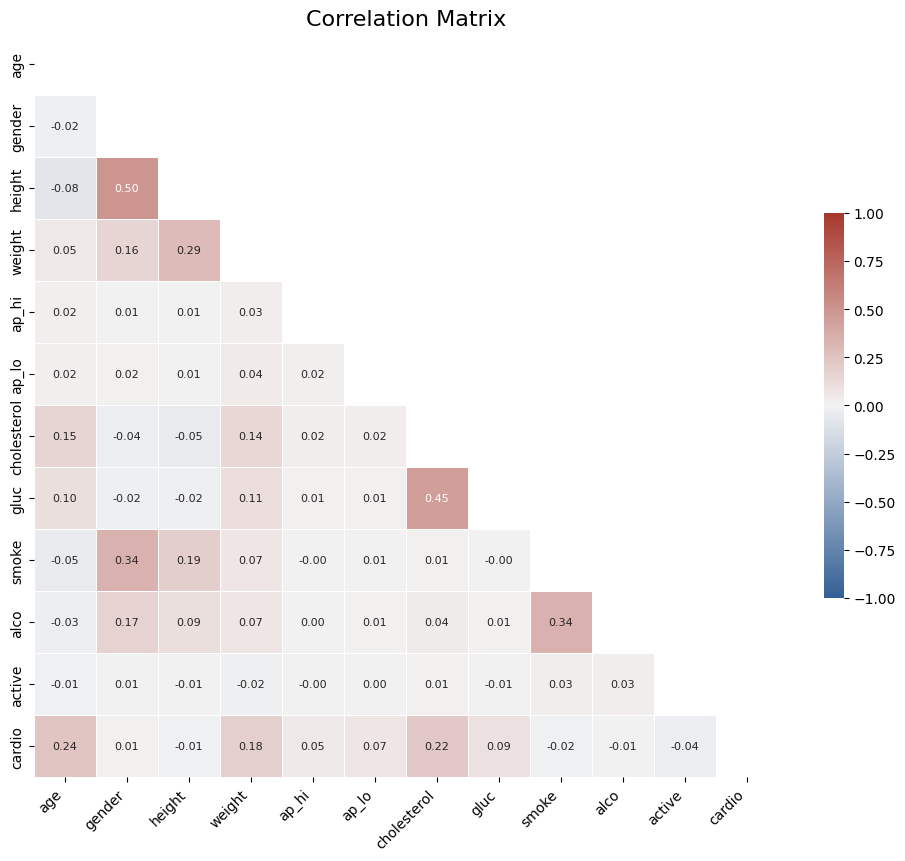

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'Df' is your DataFrame and 'correlation_matrix' has been calculated
# correlation_matrix = Df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))  # Adjust the size as needed

# Generate a custom diverging colormap with a higher contrast
cmap = sns.diverging_palette(250, 15, s=75, l=40, as_cmap=True)

# Draw the heatmap
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            annot=True, fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot_kws={"size": 8})  # Adjust annot_kws size as needed

# Improve the visibility of the labels
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust fontsize as needed
plt.yticks(fontsize=10)  # Adjust fontsize as needed

# Set the title
plt.title('Correlation Matrix', fontsize=16)

plt.show()





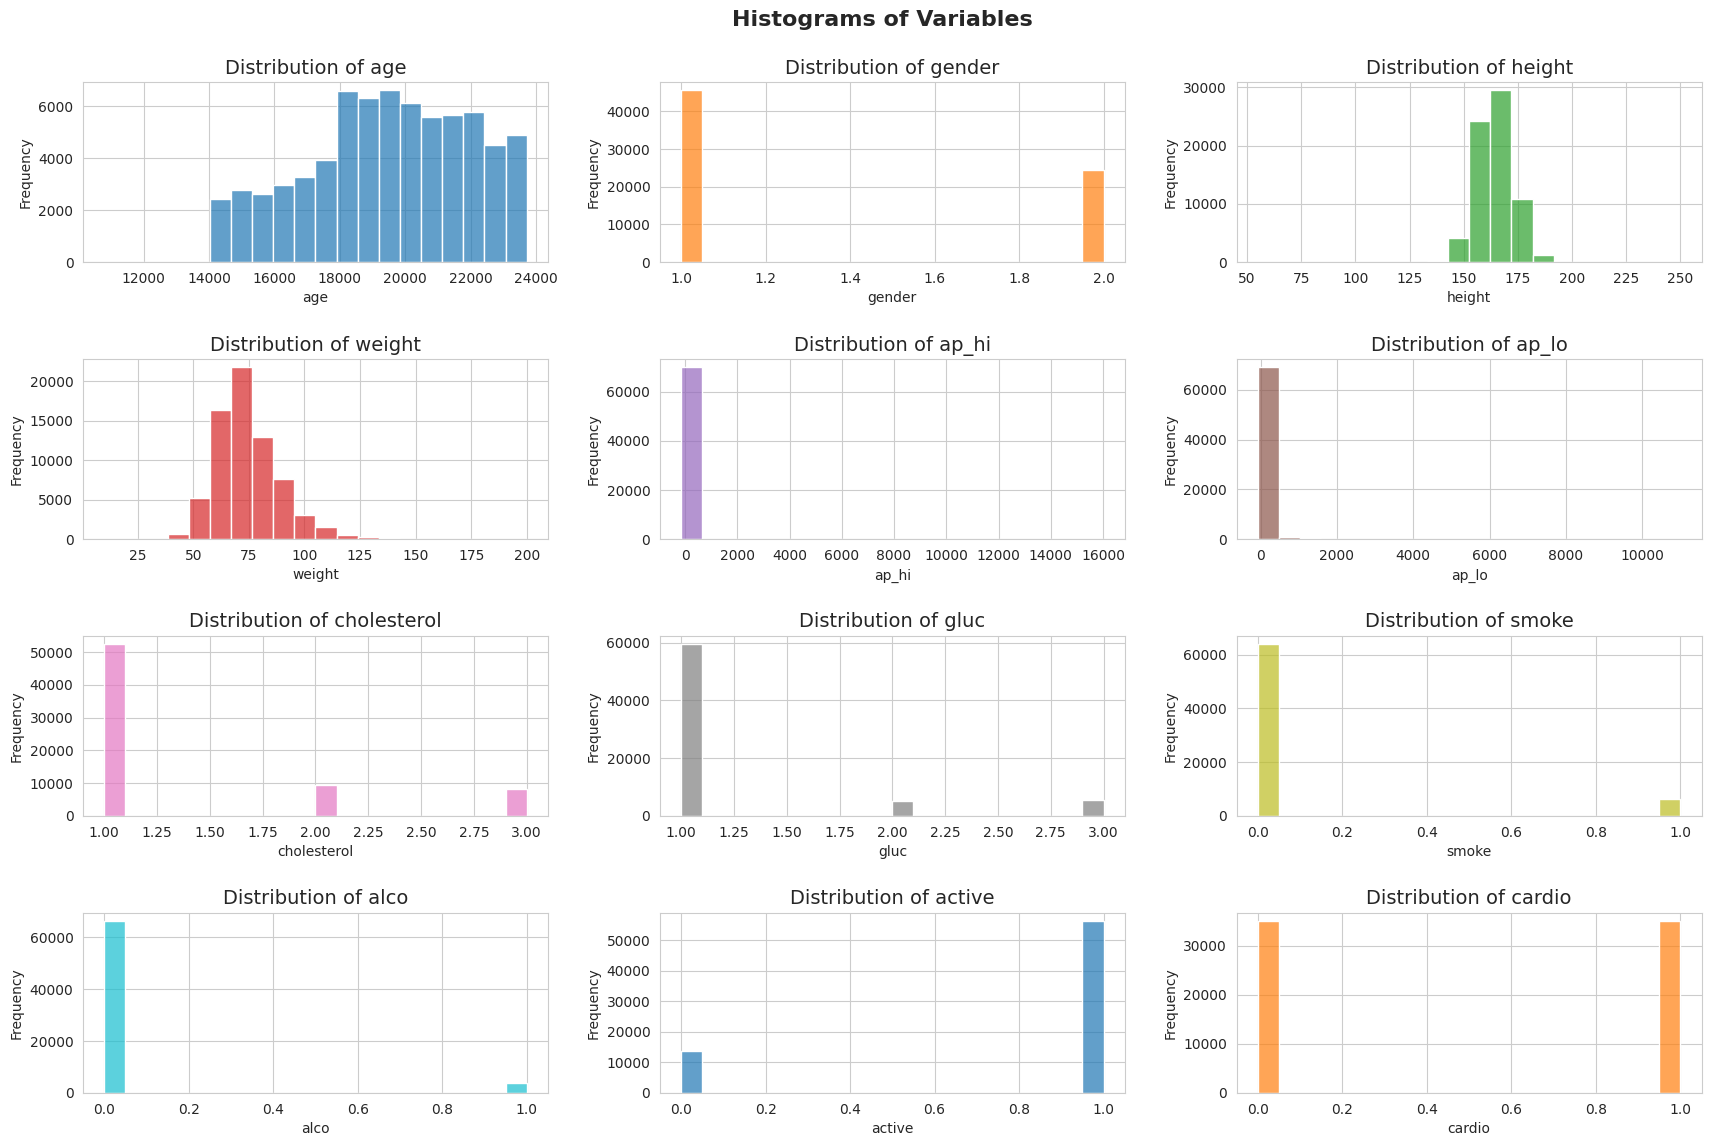

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use Seaborn to improve the visuals
sns.set_style("whitegrid")

# Assuming you have a DataFrame named df with your variables as columns

# Set up the matplotlib figure and axes, specifying the size and layout of the grid
fig, axes = plt.subplots(4, 3, figsize=(18, 12))  # Adjust the size as needed
fig.tight_layout(pad=5.0)  # Adjust the spacing between plots

# Flatten the axes array for easy indexing
axes = axes.ravel()

for i, column in enumerate(Df.columns):
    sns.histplot(data=Df, x=column, bins=20, color=f"C{i}", ax=axes[i], alpha=0.7)
    axes[i].set_title(f'Distribution of {column}', fontsize=14)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# If you have less than 12 columns, you might want to hide the empty plots
for i in range(len(Df.columns), 12):
    axes[i].set_visible(False)

# Adjust overall layout and aesthetics
plt.subplots_adjust(top=0.92)
fig.suptitle('Histograms of Variables', fontsize=16, fontweight='bold')

plt.show()




# **Transform**

In [ ]:
Df['weight'] = np.sqrt(Df['weight'])

In [ ]:
Df['height'] = Df['height']**2

In [ ]:
Df['age'] = Df['age']**3

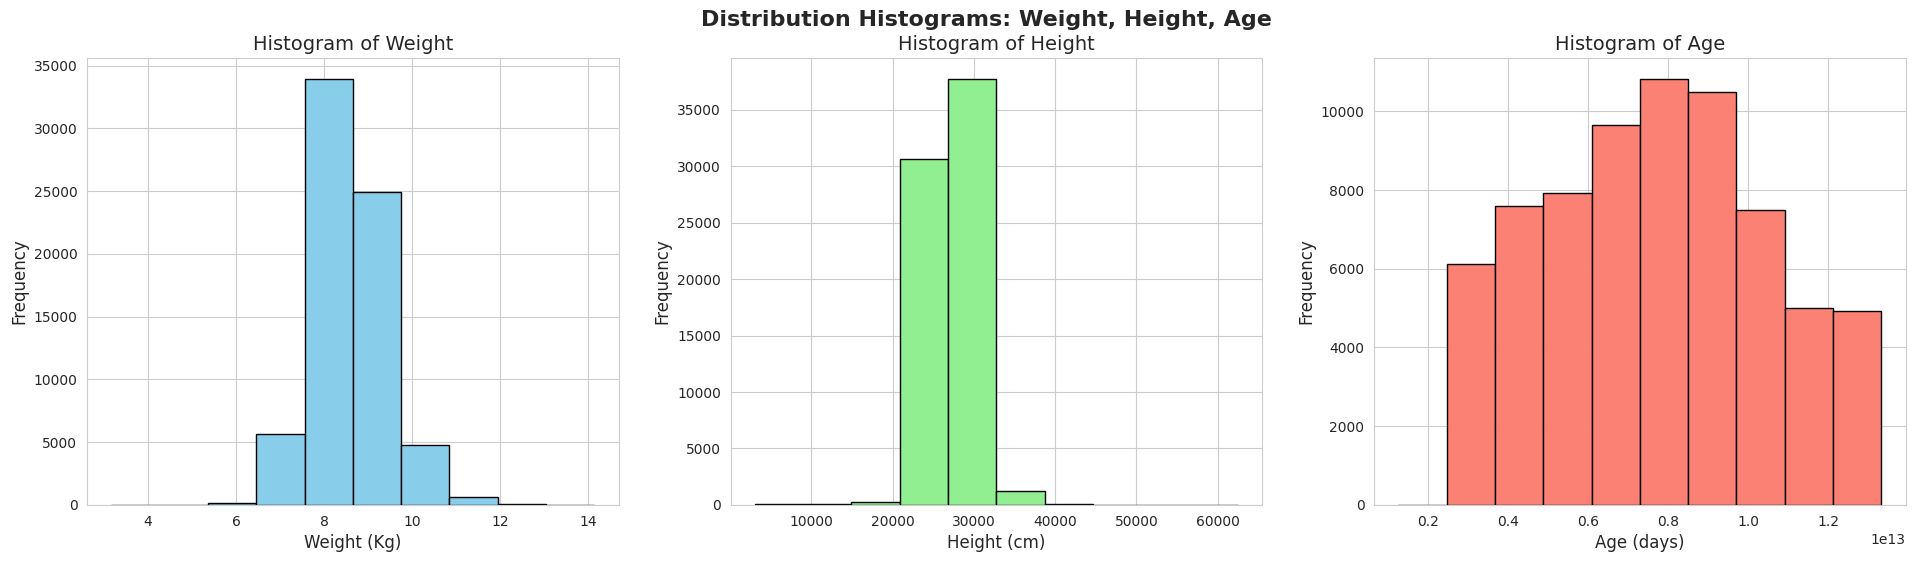

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Df is your DataFrame

# Use Seaborn to set the style for the plots
sns.set_style("whitegrid")

# Set up the matplotlib figure and axes for a 1x3 grid
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.tight_layout(pad=5.0)

# Histogram of weight
sns.histplot(data=Df, x='weight', bins=10, alpha=0.99, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_xlabel('Weight (Kg)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Histogram of Weight', fontsize=14)

# Histogram of height
sns.histplot(data=Df, x='height', bins=10, alpha=0.99, color='lightgreen', edgecolor='black', ax=axes[1])
axes[1].set_xlabel('Height (cm)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Histogram of Height', fontsize=14)

# Histogram of age
sns.histplot(data=Df, x='age', bins=10, alpha=0.99, color='salmon', edgecolor='black', ax=axes[2])
axes[2].set_xlabel('Age (days)', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
axes[2].set_title('Histogram of Age', fontsize=14)

# Adjust overall layout and aesthetics
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribution Histograms: Weight, Height, Age', fontsize=16, fontweight='bold')

plt.show()



In [ ]:
duplicate_rows

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
10562,20495,1,165,70.0,120,80,1,1,0,0,1,0
21784,16793,1,165,68.0,120,80,1,1,0,0,1,0
38505,18988,1,164,65.0,120,80,1,1,0,0,1,0
40365,14552,1,158,64.0,120,80,1,1,0,0,1,0
42450,18353,1,169,67.0,120,80,1,1,0,0,1,0
44653,16937,2,170,70.0,120,80,1,1,0,0,0,0
45125,21280,1,165,65.0,120,80,1,1,0,0,1,0
45748,22077,1,175,69.0,120,80,1,1,0,0,1,1
45810,21230,1,164,62.0,120,80,1,1,0,0,1,0
48917,21945,1,165,60.0,120,80,1,1,0,0,1,0


In [ ]:
Df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,6222396944457,2,28224,7.874008,110,80,1,1,0,0,1,0
1,8276730892352,1,24336,9.219544,140,90,3,1,0,0,1,1
2,6705293668793,1,27225,8.000000,130,70,3,1,0,0,0,1
3,5473177383367,2,28561,9.055385,150,100,1,1,0,0,1,1
4,5335522972424,1,24336,7.483315,100,60,1,1,0,0,0,0


# **Remove Duplicate**

In [ ]:
Df_cleaned = Df.drop_duplicates()

In [ ]:
print("New number of rows after dropping duplicates:", Df_cleaned.shape[0])

New number of rows after dropping duplicates: 69976


In [ ]:
Df = Df_cleaned

In [ ]:
print("New number of rows after dropping duplicates:", Df.shape[0])

New number of rows after dropping duplicates: 69976


# **Normalize**

In [ ]:
# Selecting the columns to normalize
columns_to_normalize = ['age', 'height', 'weight', 'ap_hi', 'ap_lo' ,'gender', 'cholesterol','gluc' , 'smoke', 'alco', 'active']

In [ ]:
Df_Normalized = Df.copy()

In [ ]:
# Initializing the MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Display the first few rows of the DataFrame after normalization
#Df[columns_to_normalize] = scaler.fit_transform(Df[columns_to_normalize])
Df_Normalized.loc[:, columns_to_normalize] = scaler.fit_transform(Df_Normalized[columns_to_normalize])

<ipython-input-44-069b5699c448>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Df_Normalized.loc[:, columns_to_normalize] = scaler.fit_transform(Df_Normalized[columns_to_normalize])


In [ ]:
Df_Normalized.head(100)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0.411048,1.0,0.423691,0.429125,0.016079,0.013550,0.0,0.0,0.0,0.0,1.0,0
1,0.581180,0.0,0.358319,0.551671,0.017934,0.014453,1.0,0.0,0.0,0.0,1.0,1
2,0.451039,0.0,0.406894,0.440600,0.017316,0.012647,1.0,0.0,0.0,0.0,0.0,1
3,0.349000,1.0,0.429357,0.536720,0.018553,0.015357,0.0,0.0,0.0,0.0,1.0,1
4,0.337600,0.0,0.358319,0.393542,0.015461,0.011743,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.671050,0.0,0.368878,0.375035,0.016079,0.012647,0.0,0.0,0.0,0.0,1.0,0
96,0.487224,1.0,0.406894,0.446270,0.016079,0.012647,0.0,0.0,0.0,0.0,1.0,0
97,0.412478,0.0,0.406894,0.618186,0.018553,0.016260,0.0,0.0,0.0,0.0,0.0,1
98,0.760831,1.0,0.435057,0.622751,0.016698,0.013550,0.0,0.0,0.0,0.0,0.0,1


## **Data** **Partitioning**

In [ ]:
# Randomly split  data into train, validation, and test sets

X = Df_Normalized.drop('cardio', axis=1)  # Features
y = Df_Normalized['cardio']  # Target variable

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# #train is now 75% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

# # test is now 10% of the initial data set
# # validation is now 15% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

print(f"Shape of partitions:\n X_train: {X_train.shape}, \n X_val: {X_val.shape},\n X_test: {X_test.shape}")

Shape of partitions:
 X_train: (52482, 11), 
 X_val: (10496, 11),
 X_test: (6998, 11)


# **Modelling**

# **KNN**

**Comparision for K = 2, 4, 6, 8, 10, 12, 15, 20**

In [ ]:
from sklearn import neighbors
from sklearn import metrics

# Assuming X_train, y_train, X_val, y_val are defined elsewhere in your code

n_neighbors = [2, 4, 6, 8, 10, 12, 15, 20]
scores = {}

for n_neighbor in n_neighbors:
    # Initialize and train classifier
    knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbor, weights='uniform', metric='minkowski')  # Standard Euclidean distance
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred_knn = knn.predict(X_val)

    # Calculate metrics
    accuracy = metrics.accuracy_score(y_val, y_pred_knn)
    recall = metrics.recall_score(y_val, y_pred_knn, average='macro')  # 'macro' for multiclass
    precision = metrics.precision_score(y_val, y_pred_knn, average='macro')  # 'macro' for multiclass
    f1 = metrics.f1_score(y_val, y_pred_knn, average='macro')  # 'macro' for multiclass
    confusion_mat_knn = metrics.confusion_matrix(y_val, y_pred_knn)

    # Store results in dictionary
    scores[(n_neighbor, 'KNN')] = {'accuracy': accuracy, 'recall': recall, 'precision': precision, 'f1': f1}

# Display scores
print(scores)

{(2, 'KNN'): {'accuracy': 0.5622141768292683, 'recall': 0.5642665001161979, 'precision': 0.58036105463282, 'f1': 0.540111859842837}, (4, 'KNN'): {'accuracy': 0.5802210365853658, 'recall': 0.5816221240994655, 'precision': 0.5899788899819642, 'f1': 0.5708376986983492}, (6, 'KNN'): {'accuracy': 0.6001333841463414, 'recall': 0.6012407041598884, 'precision': 0.6074350449839224, 'f1': 0.5947205017373118}, (8, 'KNN'): {'accuracy': 0.608326981707317, 'recall': 0.6092711480362538, 'precision': 0.6140288004910919, 'f1': 0.604555731280842}, (10, 'KNN'): {'accuracy': 0.6134717987804879, 'recall': 0.6142909016964908, 'precision': 0.6179783108194801, 'f1': 0.610729239928145}, (12, 'KNN'): {'accuracy': 0.6216653963414634, 'recall': 0.622387578433651, 'precision': 0.6254169129547632, 'f1': 0.6196235707974622}, (15, 'KNN'): {'accuracy': 0.6275724085365854, 'recall': 0.6277565070880781, 'precision': 0.6279297654420496, 'f1': 0.6274953114451943}, (20, 'KNN'): {'accuracy': 0.6310022865853658, 'recall': 0.

In [ ]:
import pandas as pd

# Convert the scores dictionary to a DataFrame for better visualization
scores_df = pd.DataFrame.from_dict(scores, orient='index', columns=['accuracy', 'recall', 'precision', 'f1'])

# Reset index to turn the multi-index into columns
scores_df.reset_index(inplace=True)

# Rename columns to reflect the actual parameters they represent
scores_df.rename(columns={'level_0': 'n_neighbors', 'level_1': 'weights'}, inplace=True)

# Display the DataFrame
print(scores_df)

   n_neighbors weights  accuracy    recall  precision        f1
0            2     KNN  0.562214  0.564267   0.580361  0.540112
1            4     KNN  0.580221  0.581622   0.589979  0.570838
2            6     KNN  0.600133  0.601241   0.607435  0.594721
3            8     KNN  0.608327  0.609271   0.614029  0.604556
4           10     KNN  0.613472  0.614291   0.617978  0.610729
5           12     KNN  0.621665  0.622388   0.625417  0.619624
6           15     KNN  0.627572  0.627757   0.627930  0.627495
7           20     KNN  0.631002  0.631596   0.633759  0.629706


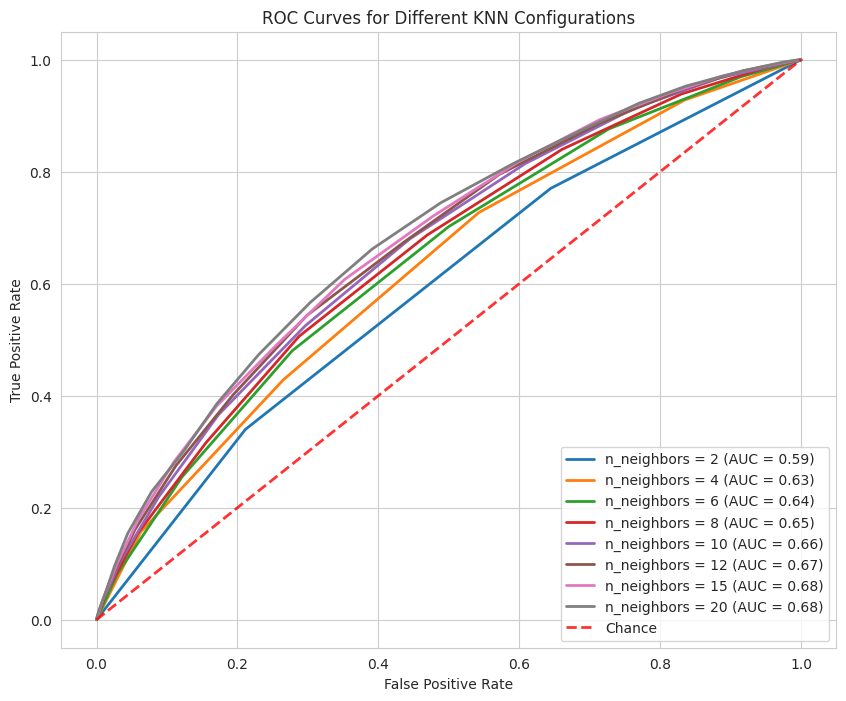

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataset has more than 2 classes, you'll need to binarize the labels
# If your dataset is binary, you can skip the binarization step
# y = label_binarize(y_val, classes=np.unique(y_val))
# n_classes = y.shape[1]

# Placeholder for the average ROC curve
mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []

plt.figure(figsize=(10, 8))

for n_neighbor in n_neighbors:
    knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbor, weights='uniform', metric='minkowski')
    knn.fit(X_train, y_train)

    # Assuming binary classification or you have selected a specific class as positive
    y_prob = knn.predict_proba(X_val)[:, 1]  # Use [:, 1] for binary; adjust for multi-class
    fpr, tpr, thresholds = roc_curve(y_val, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'n_neighbors = {n_neighbor} (AUC = {roc_auc:.2f})')
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs.append(roc_auc)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different KNN Configurations')
plt.legend(loc="lower right")
plt.show()


**KNN = 15**

In [ ]:
from sklearn import neighbors

n_neighbors = 15
knn_15 = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform', metric='minkowski') # Sandard Euclidean distance

knn_15.fit(X_train, y_train)
probs_15 = knn_15.predict_proba(X_val)
probs_15[:10]

array([[0.8       , 0.2       ],
       [0.4       , 0.6       ],
       [0.8       , 0.2       ],
       [0.46666667, 0.53333333],
       [0.6       , 0.4       ],
       [0.13333333, 0.86666667],
       [0.53333333, 0.46666667],
       [0.4       , 0.6       ],
       [0.26666667, 0.73333333],
       [0.73333333, 0.26666667]])

Accuracy with knn model: 0.6275724085365854
Confusion matrix with knn model: 
              precision    recall  f1-score   support

           0       0.62      0.65      0.63      5200
           1       0.64      0.61      0.62      5296

    accuracy                           0.63     10496
   macro avg       0.63      0.63      0.63     10496
weighted avg       0.63      0.63      0.63     10496



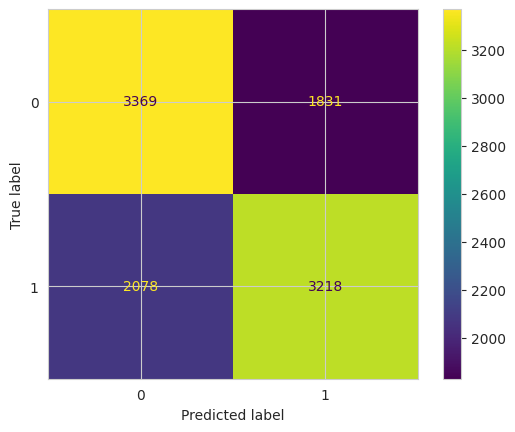

In [ ]:
y_pred_knn_15 = knn_15.predict(X_val)
acc_knn_15 = knn_15.score(X_val, y_val)
print(f"Accuracy with knn model: {acc_knn_15}")

confusion_mat_Knn_15= metrics.confusion_matrix(y_val, y_pred_knn_15)
print("Confusion matrix with knn model: ")

metrics.ConfusionMatrixDisplay.from_predictions(y_val, y_pred_knn_15)

print(metrics.classification_report(y_val, y_pred_knn_15))

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
acc_KNN_15 = metrics.accuracy_score(y_val, y_pred_knn_15)
# Assuming y_val_true are the true labels and y_val_pred are the predictions from your validation set
# y_val_pred = model.predict(X_val[selected_features])

# Sensitivity (Recall) is calculated as:
sensitivity_KNN_15 = recall_score(y_val, y_pred_knn_15)  # This is the same as True Positive Rate

# Specificity is calculated as:
specificity_KNN_15 = confusion_mat_Knn_15[0, 0] / (confusion_mat_Knn_15[0, 0] + confusion_mat_Knn_15[0, 1])  # True Negative Rate

# Precision (Positive Predictive Value) is calculated as:
precision_KNN_15 = precision_score(y_val, y_pred_knn_15)

# Print the results
print(f'Accuracy_KNN_15: {acc_KNN_15:.2f}')
print(f'Sensitivity_KNN_15 (Recall): {sensitivity_KNN_15:.2f}')
print(f'Specificity_KNN_15: {specificity_KNN_15:.2f}')
print(f'Precision_KNN_15: {precision_KNN_15:.2f}')

Accuracy_KNN_15: 0.63
Sensitivity_KNN_15 (Recall): 0.61
Specificity_KNN_15: 0.65
Precision_KNN_15: 0.64


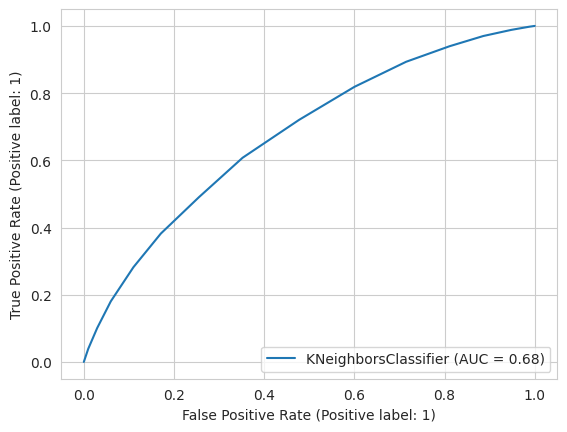

In [ ]:
metrics.RocCurveDisplay.from_estimator(knn_15, X_val, y_val)

# **SVM**

Despite using PCA and autoencoder,there was a RAM error when training SVM on the total training dataset (52,500 observations), thus we randomly selected 10,000 observations from training dataset to create the SVM model.

In [ ]:
from sklearn.model_selection import train_test_split

# Replace 'train_data' with your actual training DataFrame variable name
# Replace 'target_column_name' with the actual name of your target variable column


# Randomly sample 10,000 observations from the training dataset
X_train_sample, _, y_train_sample, _ = train_test_split(
    X_train, y_train, train_size=10000, random_state=42, stratify=y_train
)

# X_train_sample and y_train_sample now contain your random subset of 10,000 observations from the training data


In [ ]:
from sklearn import svm
svc = svm.SVC(kernel ='rbf', probability =True) # kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
svc_s = svm.SVC(kernel ='sigmoid', probability =True)
svc.fit(X_train_sample, y_train_sample)
svc_s.fit(X_train_sample, y_train_sample)
probs = svc.predict_proba(X_val)
probs_s = svc_s.predict_proba(X_val)
probs[:10]

array([[0.27618101, 0.72381899],
       [0.23942435, 0.76057565],
       [0.62996265, 0.37003735],
       [0.2804571 , 0.7195429 ],
       [0.70907263, 0.29092737],
       [0.62796405, 0.37203595],
       [0.54372879, 0.45627121],
       [0.27926446, 0.72073554],
       [0.74008204, 0.25991796],
       [0.71399728, 0.28600272]])

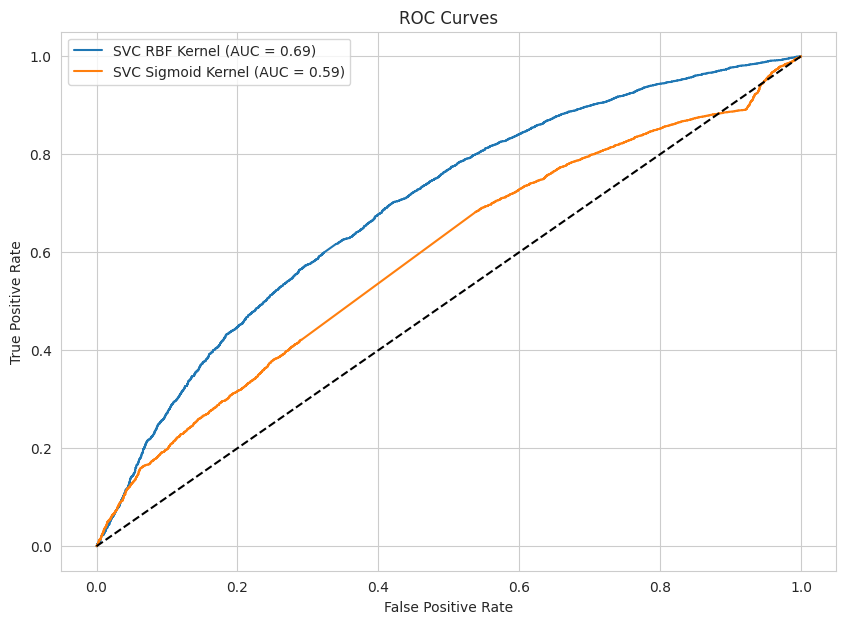

Metrics for svc with RBF kernel:
Accuracy: 0.6384336890243902
Recall: 0.6158826890116168
Precision: 0.6452513966480447
F1 Score: 0.6302250803858521
Specificity: 0.6610104861773117
AUC: 0.6918011168239052

Metrics for svc_s with sigmoid kernel:
Accuracy: 0.5720274390243902
Recall: 0.6815844601028376
Precision: 0.5593061415846226
F1 Score: 0.614420600858369
Specificity: 0.46234509056244044
AUC: 0.5920444768884187


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Assuming svc and svc_s are your trained models
# Generate class probabilities for the validation set
probs = svc.predict_proba(X_val)
probs_s = svc_s.predict_proba(X_val)

# Convert probabilities to binary predictions based on a threshold of 0.5 for the positive class
threshold = 0.5
predictions = (probs[:, 1] >= threshold).astype(int)
predictions_s = (probs_s[:, 1] >= threshold).astype(int)

# Calculate accuracy, recall, precision, and F1-score for both models
accuracy_rbf = accuracy_score(y_val, predictions)
recall_rbf = recall_score(y_val, predictions)
precision_rbf = precision_score(y_val, predictions)
f1_rbf = f1_score(y_val, predictions)

accuracy_sigmoid = accuracy_score(y_val, predictions_s)
recall_sigmoid = recall_score(y_val, predictions_s)
precision_sigmoid = precision_score(y_val, predictions_s)
f1_sigmoid = f1_score(y_val, predictions_s)

# Calculate confusion matrices to get true negatives (TN) and false positives (FP) for specificity calculation
cm = confusion_matrix(y_val, predictions)
cm_s = confusion_matrix(y_val, predictions_s)

# Specificity calculation: TN / (TN + FP)
specificity_rbf = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity_sigmoid = cm_s[0, 0] / (cm_s[0, 0] + cm_s[0, 1])

# Calculate ROC curve and AUC for both models
fpr, tpr, _ = roc_curve(y_val, probs[:, 1])
auc_rbf = auc(fpr, tpr)

fpr_s, tpr_s, _ = roc_curve(y_val, probs_s[:, 1])
auc_sigmoid = auc(fpr_s, tpr_s)

# Plot ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'SVC RBF Kernel (AUC = {auc_rbf:.2f})')
plt.plot(fpr_s, tpr_s, label=f'SVC Sigmoid Kernel (AUC = {auc_sigmoid:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='best')
plt.show()

# Print all metrics for both models
print("Metrics for svc with RBF kernel:")
print(f"Accuracy: {accuracy_rbf}")
print(f"Recall: {recall_rbf}")
print(f"Precision: {precision_rbf}")
print(f"F1 Score: {f1_rbf}")
print(f"Specificity: {specificity_rbf}")
print(f"AUC: {auc_rbf}\n")

print("Metrics for svc_s with sigmoid kernel:")
print(f"Accuracy: {accuracy_sigmoid}")
print(f"Recall: {recall_sigmoid}")
print(f"Precision: {precision_sigmoid}")
print(f"F1 Score: {f1_sigmoid}")
print(f"Specificity: {specificity_sigmoid}")
print(f"AUC: {auc_sigmoid}")



# **Decision Tree**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score

# Assuming X_train, y_train, X_val, y_val are already defined.

# Placeholder dictionary to store the scores
scores = {}

# Define ranges for the new hyperparameters
min_samples_splits = [2, 5, 10]
min_samples_leafs = [1, 2, 4]

for criterion in ['gini', 'entropy']:
    for depth in [2, 4, 6, 8, 10, 12]:
        for min_samples_split in min_samples_splits:
            for min_samples_leaf in min_samples_leafs:
                # Create and fit the model
                model = DecisionTreeClassifier(
                    criterion=criterion,
                    max_depth=depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf
                )
                model.fit(X_train, y_train)

                # Make predictions
                predictions = model.predict(X_val)

                # Get probability estimates for the positive class
                probabilities = model.predict_proba(X_val)[:, 1]

                # Calculate specificity from the confusion matrix
                cm = confusion_matrix(y_val, predictions)
                specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

                # Calculate ROC AUC score using the probabilities
                roc_auc = roc_auc_score(y_val, probabilities)

                # Update the scores dictionary
                scores[(criterion, depth, min_samples_split, min_samples_leaf)] = {
                    'accuracy': accuracy_score(y_val, predictions),
                    'recall': recall_score(y_val, predictions),
                    'precision': precision_score(y_val, predictions),
                    'f1': f1_score(y_val, predictions),
                    'specificity': specificity,
                    'roc_auc': roc_auc
                }

# Convert the scores dictionary to a DataFrame
scores_df = pd.DataFrame.from_dict(scores, orient='index')

# Set Pandas options to display all rows
pd.set_option('display.max_rows', None)

# Sort the DataFrame by ROC AUC score in descending order
scores_df_sorted = scores_df.sort_values(by='roc_auc', ascending=False)

# Reset the index for better readability
scores_df_sorted.reset_index(inplace=True)
scores_df_sorted.columns = ['Criterion', 'Depth', 'Min Samples Split', 'Min Samples Leaf', 'Accuracy', 'Recall', 'Precision', 'F1', 'Specificity', 'ROC AUC']

# Display the DataFrame
print(scores_df_sorted)


    Criterion  Depth  Min Samples Split  Min Samples Leaf  Accuracy    Recall  \
0     entropy      8                 10                 4  0.728277  0.664653   
1     entropy      8                  2                 4  0.728468  0.665030   
2     entropy      8                  2                 2  0.729135  0.665785   
3     entropy      8                  5                 4  0.728563  0.665219   
4     entropy      8                  5                 2  0.728754  0.665030   
5     entropy      8                 10                 2  0.728849  0.665597   
6     entropy      8                  2                 1  0.729135  0.665785   
7     entropy      8                 10                 1  0.728754  0.665408   
8     entropy      8                  5                 1  0.728849  0.665408   
9        gini      6                 10                 4  0.727039  0.643127   
10       gini      6                  2                 4  0.727420  0.643882   
11       gini      6        

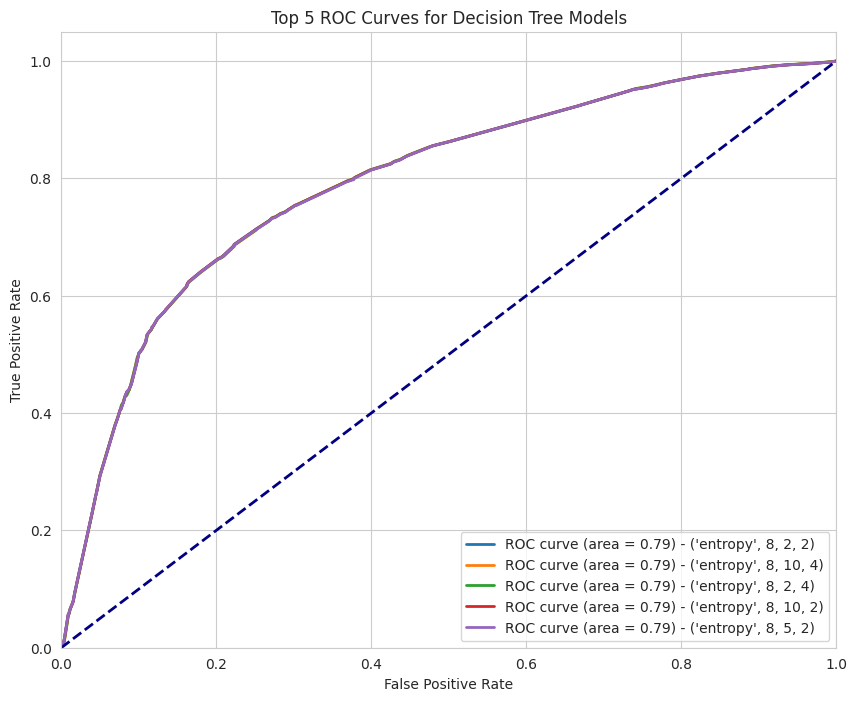

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt

# Placeholder dictionary to store the scores and models
scores = {}

# Define ranges for the new hyperparameters
min_samples_splits = [2, 5, 10]
min_samples_leafs = [1, 2, 4]

for criterion in ['gini', 'entropy']:
    for depth in [2, 4, 6, 8, 10, 12]:
        for min_samples_split in min_samples_splits:
            for min_samples_leaf in min_samples_leafs:
                # Create and fit the model
                model = DecisionTreeClassifier(
                    criterion=criterion,
                    max_depth=depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf
                )
                model.fit(X_train, y_train)

                # Get probability estimates for the positive class
                probabilities = model.predict_proba(X_val)[:, 1]

                # Calculate ROC AUC score using the probabilities
                roc_auc = roc_auc_score(y_val, probabilities)

                # Update the scores dictionary
                scores[(criterion, depth, min_samples_split, min_samples_leaf)] = {
                    'model': model,
                    'roc_auc': roc_auc
                }

# Convert the scores dictionary to a DataFrame
scores_df = pd.DataFrame.from_dict(scores, orient='index')

# Sort by ROC AUC score in descending order and take the top 5
top_scores_df = scores_df.sort_values(by='roc_auc', ascending=False).head(5)

# Initialize plot
plt.figure(figsize=(10, 8))

# Plot the ROC curves for the top 5 configurations
for index, row in top_scores_df.iterrows():
    model = row['model']
    y_prob = model.predict_proba(X_val)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f}) - {index}')

# Plot the random chance line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Top 5 ROC Curves for Decision Tree Models')
plt.legend(loc="lower right")
plt.show()


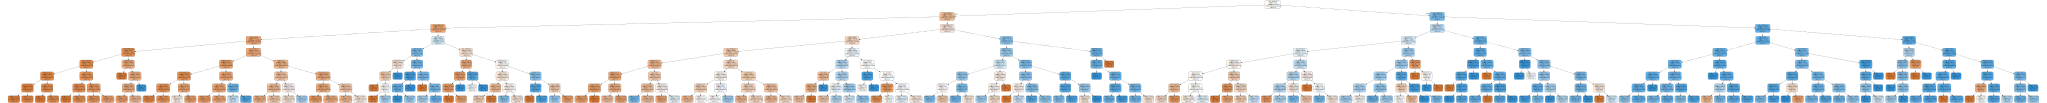

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Get the top-performing model
top_model = top_scores_df.iloc[0]['model']

# Export the decision tree to a Graphviz file
dot_data = export_graphviz(top_model, out_file=None,
                           feature_names=X_train.columns,
                           class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True)

# Plot the decision tree
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

# Display the decision tree
graph

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import pandas as pd

# Initialize a list to store evaluation metrics for each combination of hyperparameters
evaluation_metrics = []

criteria = ['gini', 'entropy']
max_depth_values = [3, 4, 5, 6, 7, 8, 9, 10]
min_samples_splits = [2, 4, 6]

for criterion in criteria:
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_splits:
            # Initialize the RandomForestClassifier with specific hyperparameters
            model = RandomForestClassifier(
                n_estimators=100,
                criterion=criterion,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=0.1,
                bootstrap=True,
                oob_score=True,
                max_samples=0.8,
                random_state=1
            )
            # Fit the model to the training data
            model.fit(X_train, y_train)

            # Predict on the validation set
            y_pred = model.predict(X_val)

            # Calculate the confusion matrix to get specificity
            cm = confusion_matrix(y_val, y_pred)
            specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

            # Calculate the ROC AUC score
            y_prob = model.predict_proba(X_val)[:, 1]
            roc_auc = roc_auc_score(y_val, y_prob)

            # Append all the metrics to the evaluation_metrics list
            evaluation_metrics.append({
                'criterion': criterion,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'accuracy': accuracy_score(y_val, y_pred),
                'precision': precision_score(y_val, y_pred, average='macro'),
                'recall': recall_score(y_val, y_pred, average='macro'),
                'f1_score': f1_score(y_val, y_pred, average='macro'),
                'specificity': specificity,
                'roc_auc': roc_auc,
                'leaf' :min_samples_leaf,
            })

# Convert the metrics list to a pandas DataFrame for better visualization
metrics_df = pd.DataFrame(evaluation_metrics)

# Sort the DataFrame based on the ROC AUC score in descending order
metrics_df = metrics_df.sort_values(by='roc_auc', ascending=False)

# Display the DataFrame
print(metrics_df)



   criterion  max_depth  min_samples_split  accuracy  precision    recall  \
47   entropy         10                  6  0.710938   0.717206  0.711685   
36   entropy          7                  2  0.710938   0.717206  0.711685   
28   entropy          4                  4  0.710938   0.717206  0.711685   
29   entropy          4                  6  0.710938   0.717206  0.711685   
30   entropy          5                  2  0.710938   0.717206  0.711685   
31   entropy          5                  4  0.710938   0.717206  0.711685   
32   entropy          5                  6  0.710938   0.717206  0.711685   
33   entropy          6                  2  0.710938   0.717206  0.711685   
34   entropy          6                  4  0.710938   0.717206  0.711685   
35   entropy          6                  6  0.710938   0.717206  0.711685   
37   entropy          7                  4  0.710938   0.717206  0.711685   
38   entropy          7                  6  0.710938   0.717206  0.711685   

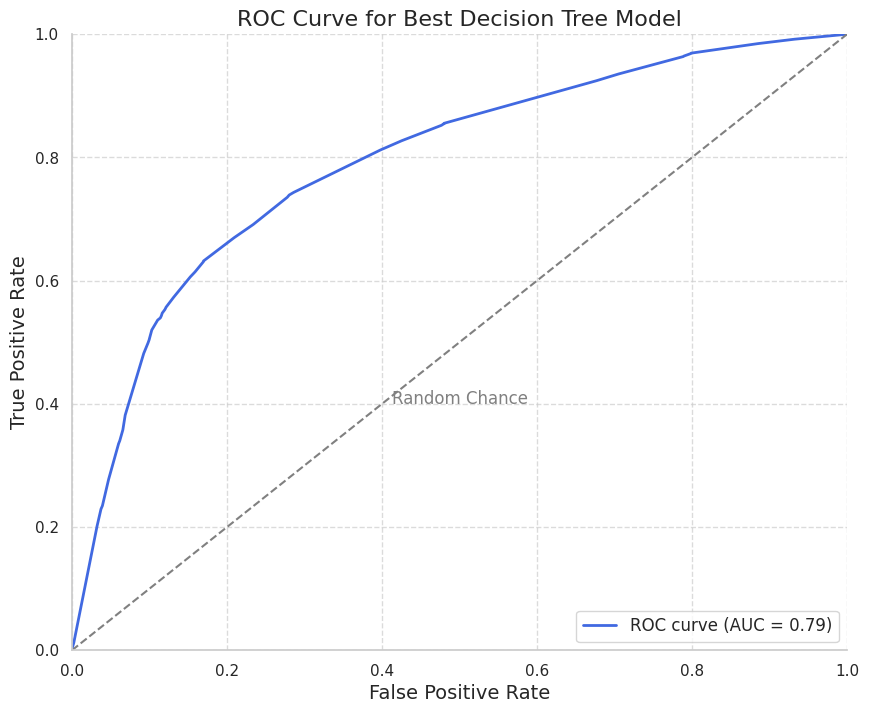

In [ ]:
import seaborn as sns

# Set Seaborn style
sns.set(style='whitegrid')

# Get the best model
best_model = top_scores_df.iloc[0]['model']

# Calculate probabilities for the best model
probabilities = best_model.predict_proba(X_val)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_val, probabilities)

# Calculate ROC AUC score
roc_auc = auc(fpr, tpr)

# Initialize plot
plt.figure(figsize=(10, 8))

# Plot the ROC curve for the best model with enhanced aesthetics
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})', color='royalblue')

# Plot the random chance line
plt.plot([0, 1], [0, 1], color='gray', lw=1.5, linestyle='--')

# Add text annotation for the random chance line
plt.text(0.5, 0.4, 'Random Chance', fontsize=12, color='gray', ha='center')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve for Best Decision Tree Model', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

# Remove the borders
sns.despine()

# Show grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# **Neural Network**

In [ ]:
from sklearn.preprocessing import  OneHotEncoder
# Convert labels to OneHotEncoder
onehotencoder = OneHotEncoder(categories='auto')
y_train_encoded = onehotencoder.fit_transform(y_train.values.reshape(-1,1)).toarray()
y_val_encoded = onehotencoder.transform(y_val.values.reshape(-1,1)).toarray()

In [ ]:
tf.random.set_seed(123)
mlp = models.Sequential()
mlp.add(layers.Dense(units=10, activation='relu')) # 'tanh'
# second hidden layer
mlp.add(layers.Dense(units=8, activation='relu'))
mlp.add(layers.Dense(units=1, activation='sigmoid'))#sigmoid for binary, softmax for multi class----using sigmoid in the output layer, y_train does not need to be one-hot encoded

In [ ]:
mlp.compile(optimizer= 'adam', loss= 'binary_crossentropy' , metrics=['accuracy'])
mlp.fit(X_train, y_train, batch_size=32, epochs=50,  verbose=1)

Epoch 1/50
1641/1641 [==============================] - 4s 2ms/step - loss: 0.6561 - accuracy: 0.6099
Epoch 2/50
1641/1641 [==============================] - 3s 2ms/step - loss: 0.6372 - accuracy: 0.6361
Epoch 3/50
1641/1641 [==============================] - 4s 2ms/step - loss: 0.6314 - accuracy: 0.6435
Epoch 4/50
1641/1641 [==============================] - 3s 2ms/step - loss: 0.6290 - accuracy: 0.6456
Epoch 5/50
1641/1641 [==============================] - 3s 2ms/step - loss: 0.6274 - accuracy: 0.6464
Epoch 6/50
1641/1641 [==============================] - 3s 2ms/step - loss: 0.6263 - accuracy: 0.6486
Epoch 7/50
1641/1641 [==============================] - 4s 2ms/step - loss: 0.6257 - accuracy: 0.6493
Epoch 8/50
1641/1641 [==============================] - 3s 2ms/step - loss: 0.6246 - accuracy: 0.6507
Epoch 9/50
1641/1641 [==============================] - 3s 2ms/step - loss: 0.6242 - accuracy: 0.6507
Epoch 10/50
1641/1641 [==============================] - 3s 2ms/step - loss: 0.623

In [ ]:
print(np.unique(y_train))

[0 1]


In [ ]:
score, acc = mlp.evaluate(X_val, y_val, batch_size=32)

328/328 [==============================] - 1s 2ms/step - loss: 0.5684 - accuracy: 0.7214


In [ ]:

y_pred_nn = mlp.predict(X_val)
print(y_pred_nn[-5:,])
predicted_class = (y_pred_nn >= 0.5).astype(int)
predicted_class[-5:,]

328/328 [==============================] - 1s 1ms/step
[[0.75700593]
 [0.6530635 ]
 [0.18052155]
 [0.39465034]
 [0.8713202 ]]


array([[1],
       [1],
       [0],
       [0],
       [1]])

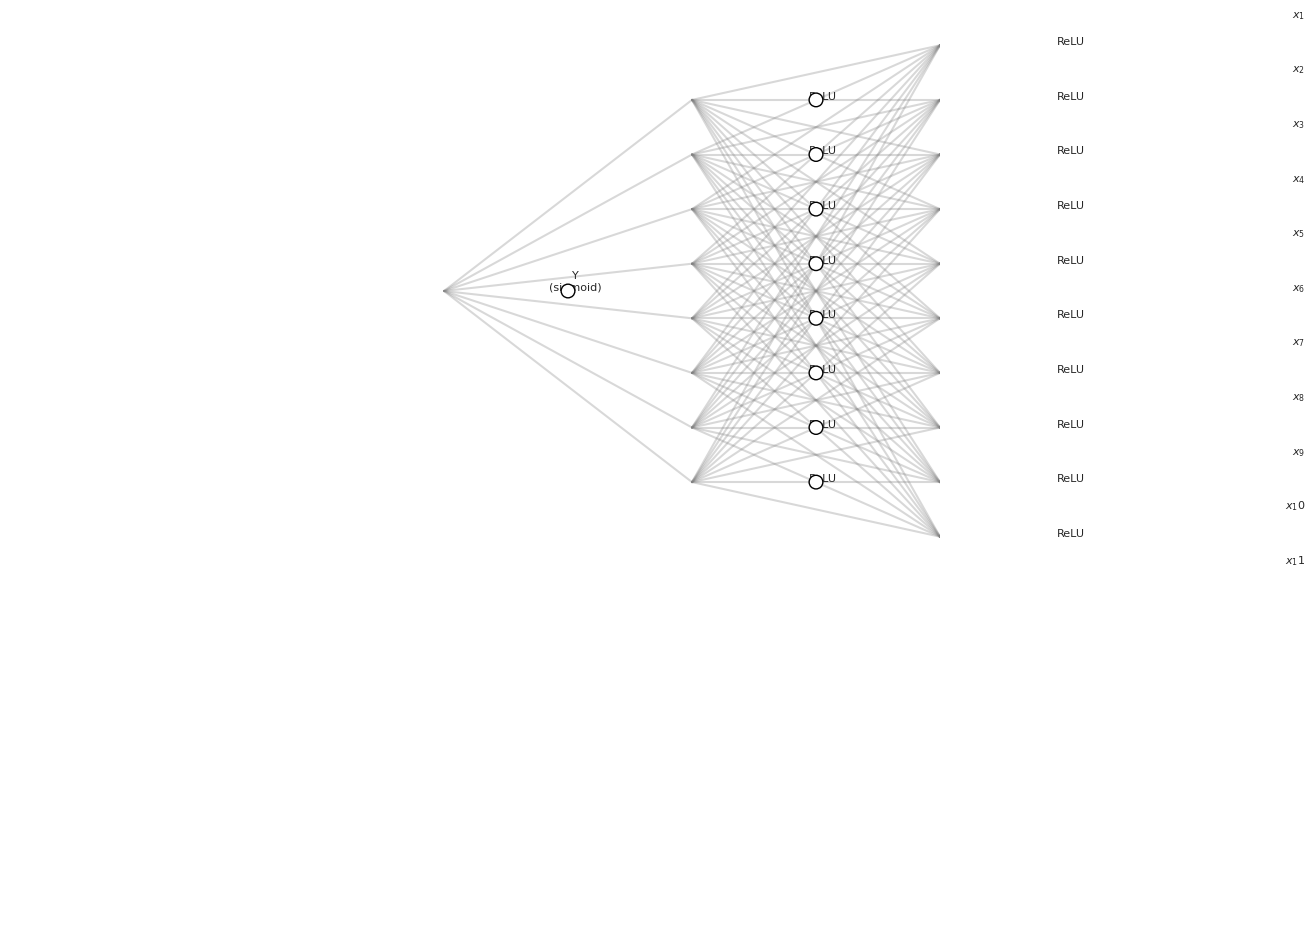

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import LineCollection
import numpy as np

# Define the function to draw the neural network
def draw_neural_net(ax, layer_sizes, activations):
    """
    Draw a neural network cartoon using matplotlib.

    :param ax: matplotlib Axes object
    :param layer_sizes: list of int, List containing the number of neurons for each layer
    :param activations: list of str, List containing the activation functions for each layer
    """
    n_layers = len(layer_sizes)
    v_spacing = (1 / float(max(layer_sizes))) * .65
    h_spacing = (1 / float(len(layer_sizes) - 1)) * .8

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = 1 - ((n - (n_layers - 1) / 2) * h_spacing)
        for m in range(layer_size):
            circle = plt.Circle((layer_top, 1 - m * v_spacing - (v_spacing * (max(layer_sizes) - layer_size)/2)),
                                v_spacing/8,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
            # Add text ID for each neuron
            if n == len(layer_sizes) - 1:
                ax.text(layer_top + v_spacing/8, 1 - m * v_spacing - (v_spacing * (max(layer_sizes) - layer_size)/2),
                        'Y\n(sigmoid)', ha='center', fontsize=8)
            elif n == 0:
                ax.text(layer_top - v_spacing/8, 1 - m * v_spacing - (v_spacing * (max(layer_sizes) - layer_size)/2),
                        f'$x_{m+1}$', ha='right', fontsize=8)
            else:
                ax.text(layer_top + v_spacing/8, 1 - m * v_spacing - (v_spacing * (max(layer_sizes) - layer_size)/2),
                        activations[n], ha='center', fontsize=8)

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = 1 - ((n - (n_layers - 2) / 2) * h_spacing)
        layer_top_b = 1 - ((n + 1 - (n_layers - 2) / 2) * h_spacing)
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([layer_top_a, layer_top_b],
                                  [1 - m * v_spacing - (v_spacing * (max(layer_sizes) - layer_size_a)/2),
                                   1 - o * v_spacing - (v_spacing * (max(layer_sizes) - layer_size_b)/2)],
                                  c='gray', alpha=0.3)
                ax.add_artist(line)

# Define the size of each layer (input layer, hidden layers, output layer)
layer_sizes = [11, 10, 8, 1]

# Define the activation functions for each layer
activations = ['Input\nLayer', 'ReLU', 'ReLU', 'Sigmoid']

# Create the figure
fig, ax = plt.subplots(figsize=(12, 12))
ax.axis('off')

# Draw the neural network
draw_neural_net(ax, layer_sizes, activations)

# Display the neural network
plt.show()

In [ ]:
acc_nn = metrics.accuracy_score(predicted_class, y_val)
acc_nn

0.7259908536585366

Accuracy with decision tree model: 0.7214176829268293
Confusion matrix with NN model:
 [[3819 1363]
 [1561 3753]]
classification_report with NN:
               precision    recall  f1-score   support

           0       0.71      0.74      0.72      5182
           1       0.73      0.71      0.72      5314

    accuracy                           0.72     10496
   macro avg       0.72      0.72      0.72     10496
weighted avg       0.72      0.72      0.72     10496



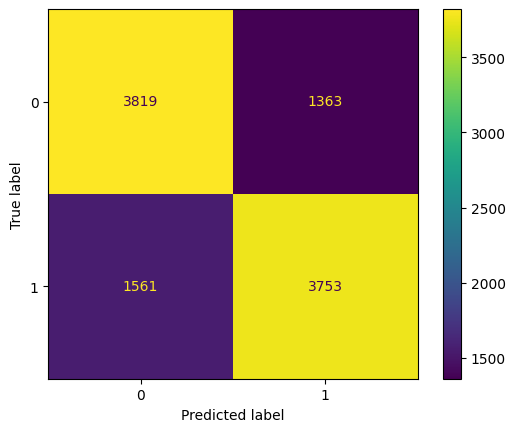

In [ ]:
acc_nn = metrics.accuracy_score(predicted_class, y_val)
print(f"Accuracy with NN model: {acc_nn}")

confusion_mat_nn = metrics.confusion_matrix(y_val, predicted_class)
print(f"Confusion matrix with NN model:\n {confusion_mat_nn}")

classification_report_nn = metrics.classification_report(y_val, predicted_class)
print(f"classification_report with NN:\n {classification_report_nn}")
metrics.ConfusionMatrixDisplay.from_predictions(y_val, predicted_class)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
acc_nn = metrics.accuracy_score(predicted_class, y_val)
# Assuming y_val_true are the true labels and y_val_pred are the predictions from your validation set
# y_val_pred = model.predict(X_val[selected_features])

# Sensitivity (Recall) is calculated as:
sensitivity_nn = recall_score(y_val, predicted_class)  # This is the same as True Positive Rate

# Specificity is calculated as:
specificity_nn = confusion_mat_nn[0, 0] / (confusion_mat_nn[0, 0] + confusion_mat_nn[0, 1])  # True Negative Rate

# Precision (Positive Predictive Value) is calculated as:
precision_nn = precision_score(y_val, predicted_class)

# Print the results
print(f'Accuracy_NN: {acc_nn:.2f}')
print(f'Sensitivity_NN (Recall): {sensitivity_nn:.2f}')
print(f'Specificity_NN: {specificity_nn:.2f}')
print(f'Precision_NN: {precision_nn:.2f}')

Accuracy_NN: 0.72
Sensitivity_NN (Recall): 0.71
Specificity_NN: 0.74
Precision_NN: 0.73


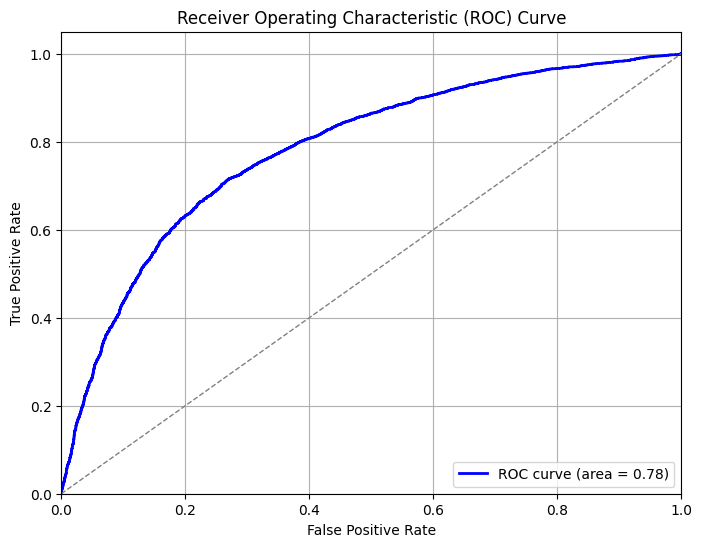

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import models
from tensorflow.keras import layers

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_val, y_pred_nn)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# **Radial Basis Function Neural Network**

In [ ]:
k_center=10
kmeans = KMeans(n_clusters=k_center, init="k-means++", max_iter=100, random_state=123)
kmeans.fit(X_train)
center = kmeans.cluster_centers_
center.shape # (k_center, X_train_c.shape[1])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 11)

In [ ]:
k_center=10
kmeans = KMeans(n_clusters=k_center, init="k-means++", max_iter=100, random_state=123)
kmeans.fit(X_train)
center = kmeans.cluster_centers_
center.shape # (k_center, X_train_c.shape[1])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 11)

In [ ]:

# @title code showing how to get cluster standard deviations (optional)
labels = kmeans.labels_
# Create a dictionary to store standard deviations
cluster_stds = {}

# Iterate over unique cluster labels
for label in np.unique(labels):
  # Select data points belonging to the current cluster
  cluster_data = X_train[labels == label]
  # Calculate standard deviation for each feature dimension
  cluster_stds[label] = np.std(cluster_data, axis=0)

determine σ:

In [ ]:

max=0
for i in range(k_center):
  for j in range(k_center):
    d=np.linalg.norm(center[i] - center[j]) # distance norm betwen two hidden neurons
    if(d>max):
      max = d
d = max
sigma = d/math.sqrt(2*k_center)

determine the output of radial basis hidden neurons:

In [ ]:
h = np.empty((X_train.shape[0], k_center), dtype=float)

for i in range(X_train.shape[0]):
  for j in range(k_center):
    dist = np.linalg.norm(X_train.iloc[i].values - center[j])  # Use `.iloc` and `.values` if X_train is a DataFrame
    h[i][j] = math.exp(-math.pow(dist,2)/(2*math.pow(sigma,2)))


weight matrix W drawn from Least Square Method to train the network:

In [ ]:
w = np.dot(np.linalg.pinv(h), y_train)

Matrix phi for validation data:

In [ ]:
h_val = np.empty((X_val.shape[0], k_center), dtype=float)

for i in range(X_val.shape[0]):
    for j in range(k_center):
        dist = np.linalg.norm(X_val.iloc[i] - center[j])  # Use .iloc for row selection
        h_val[i][j] = math.exp(-math.pow(dist,2)/(2*math.pow(sigma,2)))

Prediction Performance:

In [ ]:

predictions = np.dot(h_val, w)
print(predictions[-5:,])
y_pred_RBF = (predictions >= 0.5).astype(int)
print(y_pred_RBF[-5:,])
acc = metrics.accuracy_score(y_pred_RBF, y_val)
acc

[0.43957229 1.14551934 0.32808164 0.44866952 0.44241747]
[0 1 0 0 0]


0.5428734756097561

Accuracy with decision tree model: 0.5428734756097561
Confusion matrix with RBF model:
 [[4044 1138]
 [3660 1654]]
classification_report with RBF:
               precision    recall  f1-score   support

           0       0.52      0.78      0.63      5182
           1       0.59      0.31      0.41      5314

    accuracy                           0.54     10496
   macro avg       0.56      0.55      0.52     10496
weighted avg       0.56      0.54      0.52     10496



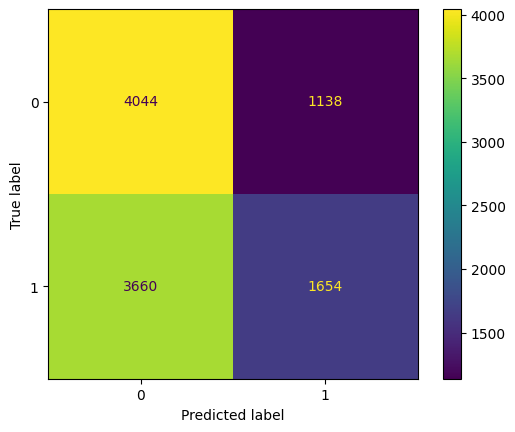

In [ ]:
acc_RBF = metrics.accuracy_score(y_pred_RBF, y_val)
print(f"Accuracy with RBF model: {acc_RBF}")

confusion_mat_RBF = metrics.confusion_matrix(y_val, y_pred_RBF)
print(f"Confusion matrix with RBF model:\n {confusion_mat_RBF}")

classification_report_RBF = metrics.classification_report(y_val, y_pred_RBF)
print(f"classification_report with RBF:\n {classification_report_RBF}")
metrics.ConfusionMatrixDisplay.from_predictions(y_val, y_pred_RBF)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
acc_RBF = metrics.accuracy_score(y_pred_RBF, y_val)
# Assuming y_val_true are the true labels and y_val_pred are the predictions from your validation set
# y_val_pred = model.predict(X_val[selected_features])

# Sensitivity (Recall) is calculated as:
sensitivity_RBF= recall_score(y_val, y_pred_RBF)  # This is the same as True Positive Rate

# Specificity is calculated as:
specificity_RBF = confusion_mat_RBF[0, 0] / (confusion_mat_RBF[0, 0] + confusion_mat_RBF[0, 1])  # True Negative Rate

# Precision (Positive Predictive Value) is calculated as:
precision_RBF = precision_score(y_val, y_pred_RBF)

# Print the results
print(f'Accuracy_RBF: {acc_RBF:.2f}')
print(f'Sensitivity_RBF (Recall): {sensitivity_RBF:.2f}')
print(f'Specificity_RBF: {specificity_RBF:.2f}')
print(f'Precision_RBF: {precision_RBF:.2f}')

Accuracy_RBF: 0.54
Sensitivity_RBF (Recall): 0.31
Specificity_RBF: 0.78
Precision_RBF: 0.59


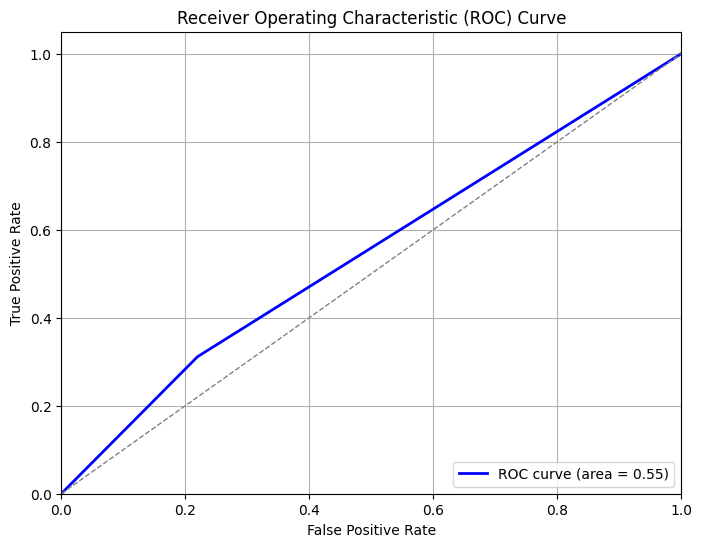

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import models
from tensorflow.keras import layers

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_val, y_pred_RBF)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# **Extreme Machine Neural Networks**

In [ ]:
np.random.seed(123)

input_size = X_train.shape[1]
hidden_size = 10
input_weights = np.random.normal(size=[input_size,hidden_size])
biases = np.random.normal(size=[hidden_size])

In [ ]:

def hidden_nodes(X): # hh_j = activation(W_ij*X_i + b_j)
    G = np.dot(X, input_weights)
    G = G + biases
    H = tf.keras.activations.relu(G)
    return H
H =hidden_nodes(X_train)
output_weights = np.dot(np.linalg.pinv(H), y_train) # pinv: Compute the (Moore-Penrose) pseudo-inverse of a matrix.
output_weights

array([-0.06963848, -0.05903345, -0.05817039, -0.09482143,  0.20866418,
        0.19882935,  0.04812965,  0.03520626,  0.14003473,  0.        ])

# Predict on a validation set:

In [ ]:

def predict(X):
    out = hidden_nodes(X)
    out = np.dot(out, output_weights)
    return out

predictions_em_nn = predict(X_val)
print(predictions_em_nn[-5:,])
y_pred_em_nn = (predictions_em_nn >= 0.5).astype(int)
print(y_pred_em_nn[-5:,])
acc_em_nn = metrics.accuracy_score(y_val, y_pred_em_nn)
acc


[0.46677178 0.64529613 0.2413718  0.43722638 0.46257867]
[0 1 0 0 0]


0.6191882621951219

Accuracy with Extreme Machine NN model: 0.6275724085365854
Confusion matrix with Extreme Machine NN  model:
 [[3443 1739]
 [2170 3144]]
classification_report with Extreme Machine NN:
               precision    recall  f1-score   support

           0       0.61      0.66      0.64      5182
           1       0.64      0.59      0.62      5314

    accuracy                           0.63     10496
   macro avg       0.63      0.63      0.63     10496
weighted avg       0.63      0.63      0.63     10496



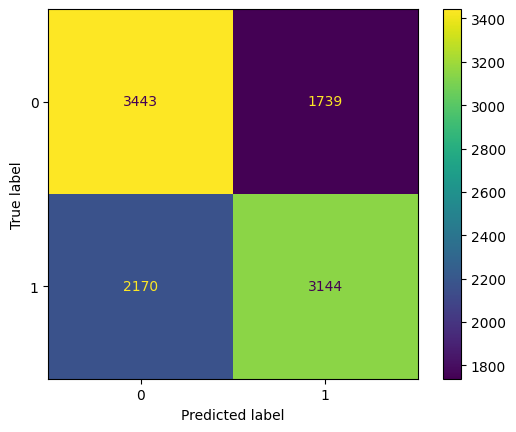

In [ ]:
acc_em_nn = metrics.accuracy_score(y_val, y_pred_em_nn)
print(f"Accuracy with Extreme Machine NN model: {acc_em_nn}")

confusion_mat_em_nn = metrics.confusion_matrix(y_val, y_pred_em_nn)
print(f"Confusion matrix with Extreme Machine NN  model:\n {confusion_mat_em_nn}")

classification_report_em_nn = metrics.classification_report(y_val, y_pred_em_nn)
print(f"classification_report with Extreme Machine NN:\n {classification_report_em_nn}")
metrics.ConfusionMatrixDisplay.from_predictions(y_val, y_pred_em_nn)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
acc_em_nn = metrics.accuracy_score(y_pred_em_nn, y_val)

# Sensitivity (Recall) is calculated as:
sensitivity_extnn = recall_score(y_val, y_pred_em_nn)  # This is the same as True Positive Rate

# Specificity is calculated as:
specificity_extnn = confusion_mat_em_nn[0, 0] / (confusion_mat_em_nn[0, 0] + confusion_mat_em_nn[0, 1])  # True Negative Rate

# Precision (Positive Predictive Value) is calculated as:
precision_extnn = precision_score(y_val, y_pred_em_nn)

# Print the results
print(f'Accuracy_extnn: {acc_em_nn:.2f}')
print(f'Sensitivity_extnn (Recall): {sensitivity_extnn:.2f}')
print(f'Specificity_extnn: {specificity_extnn:.2f}')
print(f'Precision_extnn: {precision_extnn:.2f}')

Accuracy_extnn: 0.63
Sensitivity_extnn (Recall): 0.59
Specificity_extnn: 0.66
Precision_extnn: 0.64


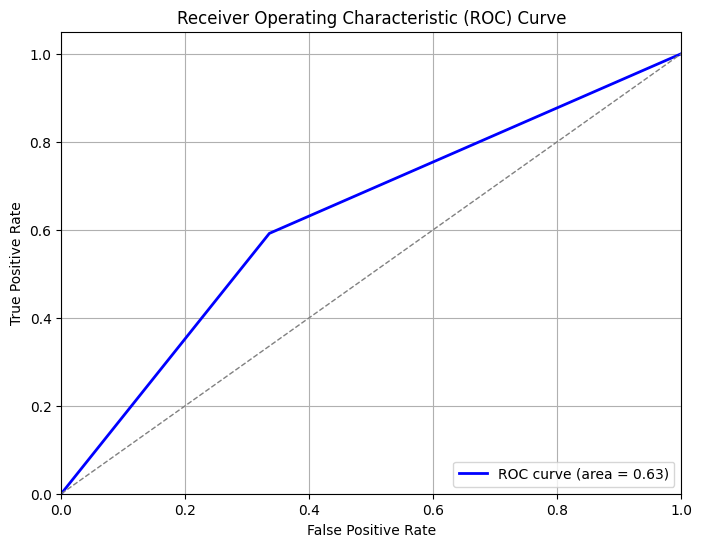

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import models
from tensorflow.keras import layers

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_val, y_pred_em_nn)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Best Model:**

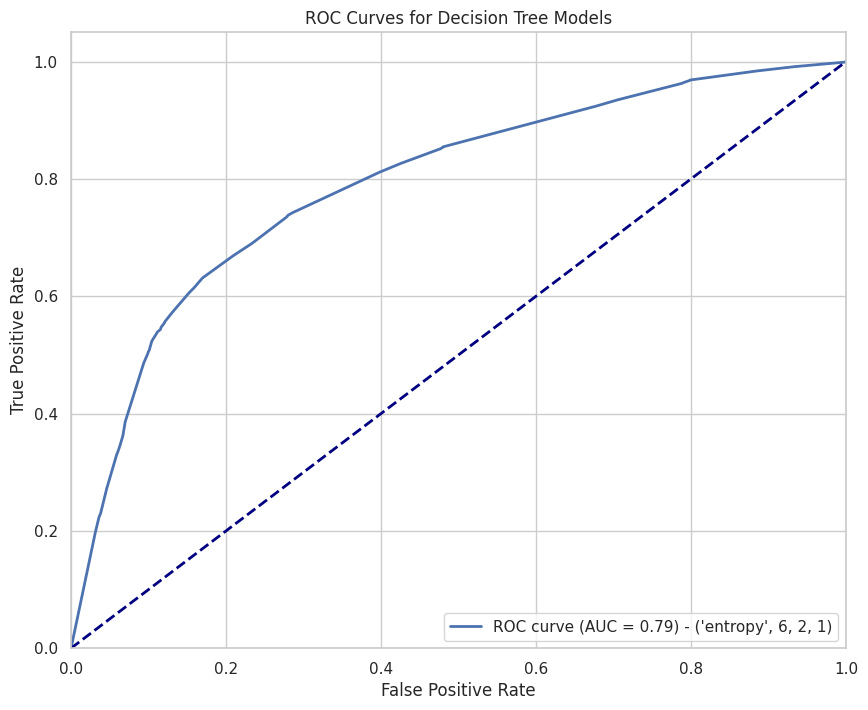

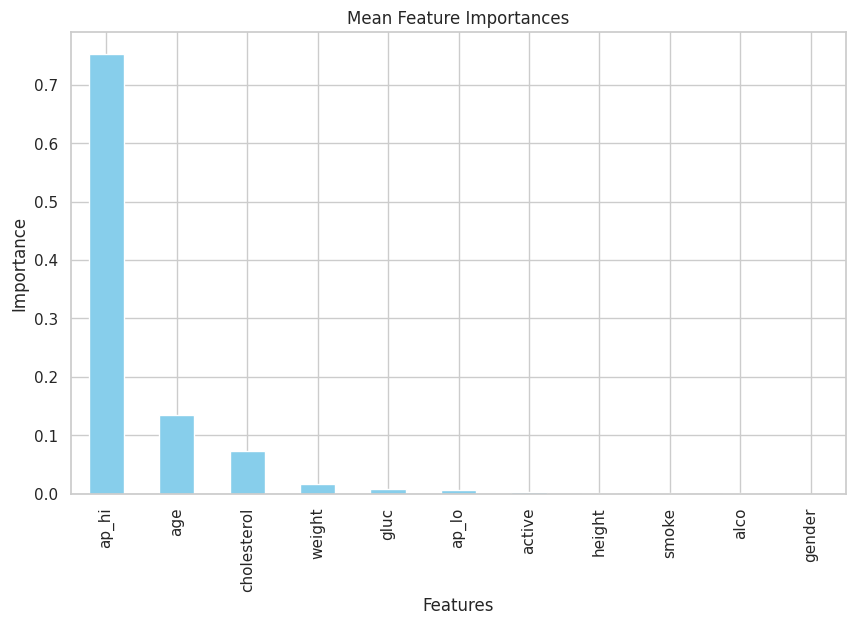

Mean Feature Importances:
ap_hi: 0.7526
age: 0.1351
cholesterol: 0.0725
weight: 0.0166
gluc: 0.0087
ap_lo: 0.0073
active: 0.0035
height: 0.0019
smoke: 0.0011
alco: 0.0008
gender: 0.0000


<ipython-input-93-9b203705f337>:91: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for feature, importance in mean_feature_importance.iteritems():


In [ ]:
#Importance of parameters of the best model (Decision Tree)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Placeholder variables for X_train, y_train, X_val, y_val
# Replace these with your actual datasets
# X_train, y_train, X_val, y_val = ...

# Initialize feature importances DataFrame
feature_importances = pd.DataFrame(columns=X_train.columns)

# Placeholder dictionary to store the scores and models
scores = {}

# Define ranges for the hyperparameters (currently using just one set of hyperparameters for demonstration)
min_samples_splits = [2]  # Only considering min_samples_split = 2
min_samples_leafs = [1]   # Only considering min_samples_leaf = 1

for criterion in [ 'entropy']:
    for depth in [6]:  # Only considering max depth = 6
        for min_samples_split in min_samples_splits:
            for min_samples_leaf in min_samples_leafs:
                # Create and fit the model
                model = DecisionTreeClassifier(
                    criterion=criterion,
                    max_depth=depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf
                )
                model.fit(X_train, y_train)

                # Get probability estimates for the positive class
                probabilities = model.predict_proba(X_val)[:, 1]

                # Calculate ROC AUC score using the probabilities
                roc_auc = roc_auc_score(y_val, probabilities)

                # Update the scores dictionary
                scores[(criterion, depth, min_samples_split, min_samples_leaf)] = {
                    'model': model,
                    'roc_auc': roc_auc
                }

                # Append feature importances to DataFrame
                feature_importances.loc[len(feature_importances)] = model.feature_importances_

# Convert the scores dictionary to a DataFrame
scores_df = pd.DataFrame.from_dict(scores, orient='index')

# Sort by ROC AUC score in descending order and take the top 5
top_scores_df = scores_df.sort_values(by='roc_auc', ascending=False).head(5)

# Initialize plot for ROC curves
plt.figure(figsize=(10, 8))

# Plot the ROC curves for the top 5 configurations
for index, row in top_scores_df.iterrows():
    model = row['model']
    y_prob = model.predict_proba(X_val)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.2f}) - {index}')

# Plot the random chance line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize the plot for ROC curves
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Decision Tree Models')
plt.legend(loc="lower right")
plt.show()

# Calculate mean feature importance across top models
mean_feature_importance = feature_importances.mean().sort_values(ascending=False)

# Create a bar plot for mean feature importances
plt.figure(figsize=(10, 6))
mean_feature_importance.plot(kind='bar', color='skyblue')
plt.title('Mean Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Print formatted feature importances
print("Mean Feature Importances:")
for feature, importance in mean_feature_importance.iteritems():
    print(f"{feature}: {importance:.4f}")


In [ ]:
#Performance of Best Model (Decision Tree) on Test Data Set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

# Assuming 'X_train', 'y_train' are your training data and 'X_test', 'y_test' are your test data

# Create and fit the model with the best hyperparameters
best_model = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=2, min_samples_leaf=1)
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = best_model.predict(X_test)
y_pred_prob_test = best_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Calculate metrics
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, pos_label=1)
recall_test = recall_score(y_test, y_pred_test, pos_label=1)
roc_auc_test = roc_auc_score(y_test, y_pred_prob_test)
confusion_mat_test = confusion_matrix(y_test, y_pred_test)

# Since we focus on the positive class, specificity needs to be calculated separately
tn, fp, fn, tp = confusion_mat_test.ravel()
specificity_test = tn / (tn+fp)

# Display the metrics
print(f'Accuracy: {accuracy_test:.2f}')
print(f'Precision (Positive Predictive Value): {precision_test:.2f}')
print(f'Recall (Sensitivity or True Positive Rate): {recall_test:.2f}')
print(f'Specificity (True Negative Rate): {specificity_test:.2f}')
print(f'ROC AUC (Area Under the Receiver Operating Characteristic Curve): {roc_auc_test:.2f}')

# Display the confusion matrix
print('Confusion Matrix:')
print(confusion_mat_test)

# For a detailed classification report including F1 score
print('Classification Report:')
print(classification_report(y_test, y_pred_test))

# If you need the F1 score specifically for the positive class
from sklearn.metrics import f1_score
f1_test = f1_score(y_test, y_pred_test, pos_label=1)
print(f'F1 Score (Positive Class): {f1_test:.2f}')

Accuracy: 0.73
Precision (Positive Predictive Value): 0.77
Recall (Sensitivity or True Positive Rate): 0.67
Specificity (True Negative Rate): 0.79
ROC AUC (Area Under the Receiver Operating Characteristic Curve): 0.79
Confusion Matrix:
[[2758  715]
 [1167 2358]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.79      0.75      3473
           1       0.77      0.67      0.71      3525

    accuracy                           0.73      6998
   macro avg       0.74      0.73      0.73      6998
weighted avg       0.74      0.73      0.73      6998

F1 Score (Positive Class): 0.71


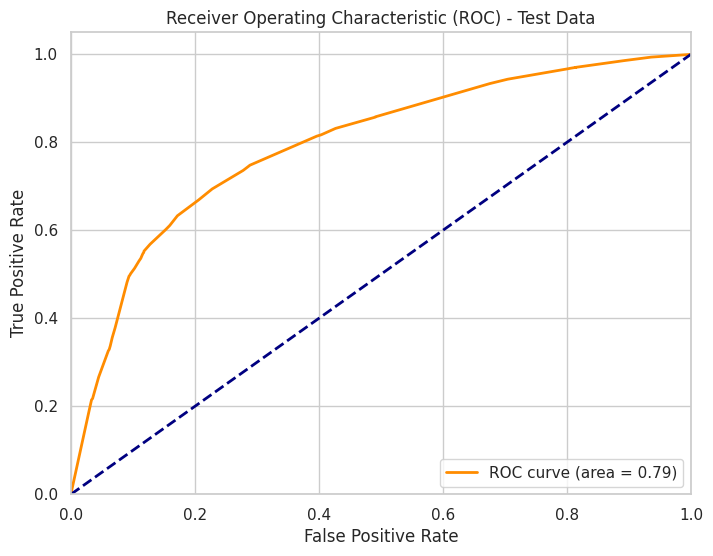

In [ ]:
#AUC of Best Model (Decision Tree)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_pred_prob_test contains the predicted probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Data')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

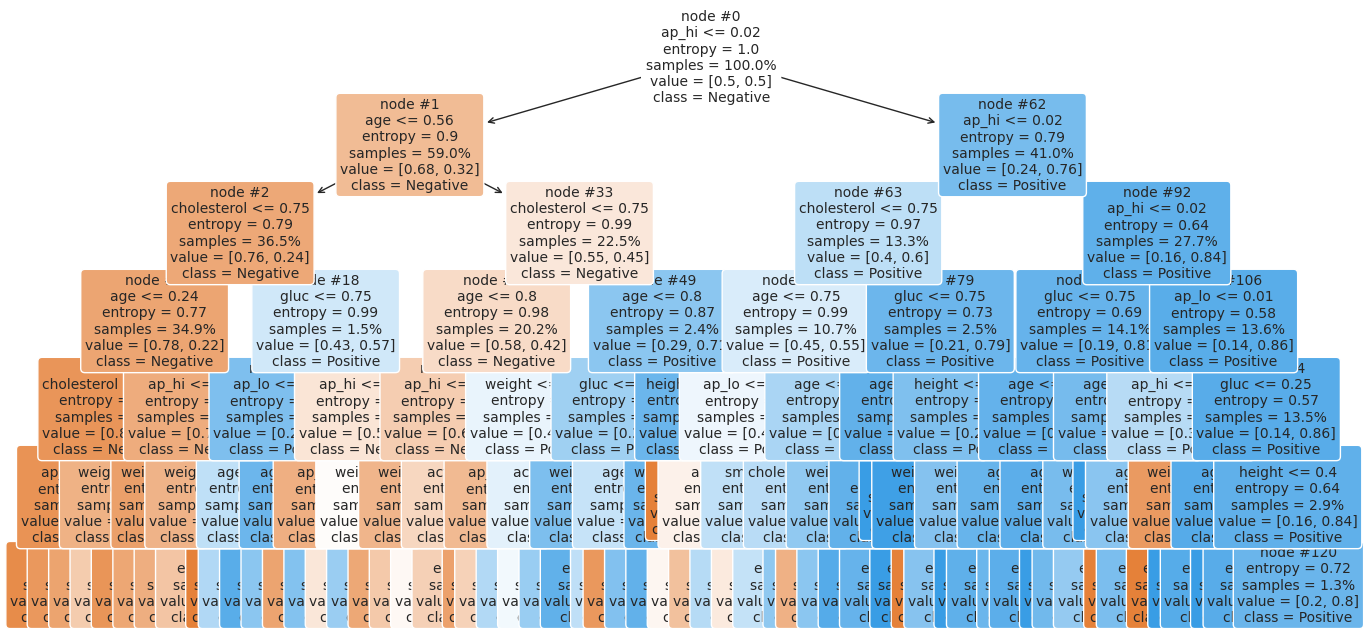

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np

# Define a color map for node purity
def purity_color(purity):
    # Define the range of colors from white to dark blue
    color_range = ['#FFFFFF', '#F0F0FF', '#E0E0FF', '#D1D1FF', '#C1C1FF', '#B1B1FF', '#A1A1FF', '#9191FF', '#8282FF', '#7272FF', '#6262FF', '#5353FF', '#4343FF', '#3333FF', '#2424FF', '#1414FF', '#0505FF']
    # Scale purity to match color range
    scaled_purity = min(int(purity * len(color_range)), len(color_range) - 1)
    return color_range[scaled_purity]

# Create and fit the decision tree model with desired hyperparameters
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=6,
    min_samples_split=2,
    min_samples_leaf=1
)
model.fit(X_train, y_train)

# Generate decision tree plot
plt.figure(figsize=(16, 8))
plot_tree(model, filled=True, impurity=True, class_names=['Negative', 'Positive'], feature_names=X_train.columns, node_ids=True, proportion=True, rounded=True, fontsize=10, precision=2, label='all', ax=None)
plt.show()